# Atmospheric deposition and precipitation & temperature

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
atmos = pd.read_table('datasets/e081_Atmospheric deposition and precipitation.txt')
temp = pd.read_csv('datasets/MS00101_v9.csv')

In [64]:
display(atmos.sample(5))
display(temp.sample(5))

,NADPSiteID,Date On,Date Off,Ca,Mg,K,Na,NH4,NO3,Cl,...,Field Cond,FV Cond,Svol,RG Ppt,Sub Ppt,Lab Type,Valcode,Invalcode,Notes,Error code
635,MN01,4/3/2001,4/10/2001,0.460,0.039,0.044,0.098,0.830,1.400,0.130,...,12.5,p,1812.8,15.24,15.240,w,w,NaN,NaN,NaN
228,MN01,9/13/1988,NaN,0.091,0.024,-0.040,-0.030,0.462,0.670,0.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,MN01,1/7/1997,1/14/1997,0.350,0.033,0.019,0.074,0.060,3.230,0.130,...,17.9,p,108.3,2.54,2.540,w,w,NaN,NaN,NaN
700,MN01,7/2/2002,7/9/2002,0.550,0.105,0.087,0.185,0.670,2.120,0.290,...,13.2,p,2654.3,NaN,39.097,w,w,NaN,NaN,NaN
900,MN01,5/2/2006,5/9/2006,0.576,0.088,0.122,0.030,2.039,2.455,0.083,...,NaN,-,100.2,1.27,1.270,w,w,NaN,NaN,NaN


,DBCODE,ENTITY,SITECODE,AIRTEMP_METHOD,HEIGHT,QC_LEVEL,PROBE_CODE,DATE,AIRTEMP_MEAN_DAY,AIRTEMP_MEAN_FLAG,AIRTEMP_MAX_DAY,AIRTEMP_MAX_FLAG,AIRTEMP_MAXTIME,AIRTEMP_MIN_DAY,AIRTEMP_MIN_FLAG,AIRTEMP_MINTIME,EVENT_CODE
53425,MS001,1,CS2MET,AIR129,150,2D,AIRCS202,2004-11-14,6.6,A,10.9,A,1508.0,2.9,A,716.0,NaN
24544,MS001,1,CENMET,AIR153,250,1D,AIRCEN03,2015-08-30,10.2,A,12.1,A,210.0,9.1,A,610.0,NaN
209340,MS001,1,VANMET,AIR135,450,2D,AIRVAN04,2004-03-26,NaN,M,NaN,M,NaN,NaN,M,NaN,NaN
128706,MS001,1,PRIMET,AIR241,150,1D,AIRPRI06,2015-02-14,5.6,A,12.9,A,1440.0,1.4,A,725.0,NaN
63637,MS001,1,H15MET,AIR117,450,2D,AIRH1501,2005-06-10,11.1,A,16.0,A,1024.0,6.9,A,414.0,NaN


In [68]:
atmos['Year'] = atmos['Date On'].str.extract(r'\d+\/\d+\/(\d+)')
temp['Year'] = temp['DATE'].str.extract(r'(\d+)-')

In [32]:
atmos.columns

Index(['NADPSiteID', 'Date On', 'Date Off', 'Ca', 'Mg', 'K', 'Na', 'NH4',
       'NO3', 'Cl', 'SO4', 'NO2', 'Br', 'F', 'PO4', 'Al', 'B', 'Cu', 'Fe',
       'Mn', 'Ni', 'Pb', 'Zn', 'Precipitation (mm)', 'pH Field',
       'Conductivity', 'pH Lab', 'pH FV', 'Lab Cond', 'Field Cond', 'FV Cond',
       'Svol', 'RG Ppt', 'Sub Ppt', 'Lab Type', 'Valcode', 'Invalcode',
       'Notes', 'Error code', 'Year'],
      dtype='object')

## BioCon atmos deposition

<AxesSubplot:xlabel='Year', ylabel='Ca'>

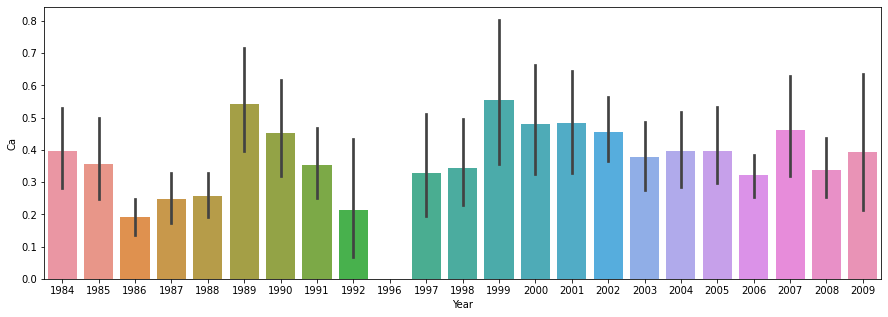

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(data=atmos, x='Year', y='Ca')

<AxesSubplot:xlabel='Year', ylabel='AIRTEMP_MAX_DAY'>

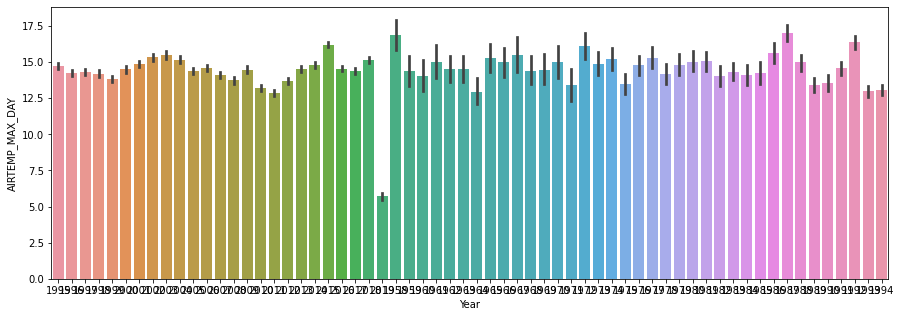

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(data=temp, x='Year', y='AIRTEMP_MAX_DAY')

## Andrews Forsest Meteorological Station - air temperature
#### Pollinator dataset

In [93]:
temp.columns

Index(['DBCODE', 'ENTITY', 'SITECODE', 'AIRTEMP_METHOD', 'HEIGHT', 'QC_LEVEL',
       'PROBE_CODE', 'DATE', 'AIRTEMP_MEAN_DAY', 'AIRTEMP_MEAN_FLAG',
       'AIRTEMP_MAX_DAY', 'AIRTEMP_MAX_FLAG', 'AIRTEMP_MAXTIME',
       'AIRTEMP_MIN_DAY', 'AIRTEMP_MIN_FLAG', 'AIRTEMP_MINTIME', 'EVENT_CODE',
       'Year'],
      dtype='object')

<AxesSubplot:xlabel='Year'>

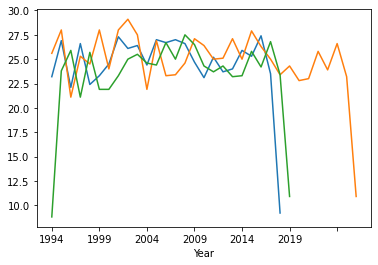

In [92]:
temp[temp['SITECODE'] == 'CENMET'].groupby('Year')['AIRTEMP_MEAN_DAY'].max().plot()
temp[temp['SITECODE'] == 'VANMET'].groupby('Year')['AIRTEMP_MEAN_DAY'].max().plot()
temp[temp['SITECODE'] == 'UPLMET'].groupby('Year')['AIRTEMP_MEAN_DAY'].max().plot()

### Feature Engineering

Text(0.5, 1.0, 'Correlation matrix')

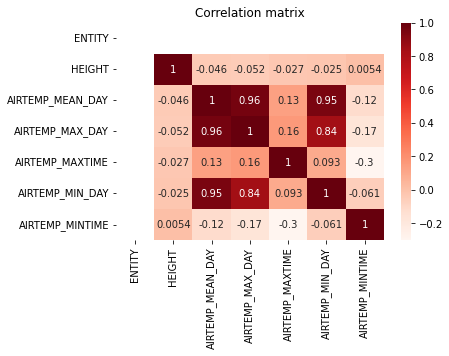

In [95]:
sns.heatmap(temp.corr(), annot=True, cmap=plt.cm.Reds)
plt.title('Correlation matrix')

### Fitting and prediction

In [ ]:
# Create train/test sets
#X = mask_data.drop(columns=['9/12/2021_cpc'])
#y = mask_data['9/12/2021_cpc']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

# fit the linear model and make predictions
#model = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)

#y_fitted = model.predict(X_train)
#y_predicted = model.predict(X_test)

# compute RMSE on train and test sets
#train_rmse_cpc = np.sqrt(np.mean((y_fitted - y_train)**2))
#test_rmse_cpc = np.sqrt(np.mean((y_predicted - y_test)**2))

#train_rmse_cpc, test_rmse_cpc